In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [13]:
def find_first_day(device_id, df_cleaned):
    df_target = df_cleaned[df_cleaned['device_id']==device_id]
    return min(df_target['date'])

In [14]:
def get_1_to_28(df_cleaned):
    first_day = {device_id:find_first_day(device_id, df_cleaned) 
                 for device_id in set(df_cleaned['device_id'].tolist())
                if find_first_day(device_id, df_cleaned)>=datetime.date(year=2022,month=11,day=11)}
    df_cleaned = df_cleaned[df_cleaned['device_id'].isin(first_day)]
    df_cleaned['day'] = df_cleaned.apply(lambda x: 1+(x['date']-first_day[x['device_id']]).days, axis = 1)
    df_cleaned = df_cleaned[df_cleaned['day']<=28]
    return df_cleaned

In [27]:
sleep = [1,4,7,10,13,16,19,22,25,28]
exercise = [2,5,8,11,14,17,20,23,26]
social = [3,6,9,12,15,18,21,24,27]

# correlation matrix

In [60]:
df_id = pd.read_csv("/data/meditation/majid/tables/id.csv")
df_id = df_id.drop_duplicates('study_id')
df_id

,device_id,id,study_id
0,4a23c5dc-9a50-4d46-a12d-dd94ee98270f,8415477,8415477
1,f3845ba4-8702-42cf-a14f-051c46f66b61,15027959,15027959
2,ae02314b-a607-41b9-9507-28ffa1babed7,73386307,73386307
3,b460f89e-fd76-46ff-a960-989d74fcb66a,87785016,87785016
4,e5048fab-dc20-4d99-8cea-220a5a2750e0,14851895,14851895
...,...,...,...
70,780c9b18-72d3-4714-858d-3c91b3719155,21788465,21788465
71,a1118578-bbb4-47ef-b784-7d5bd09ad8b5,7389236,7389236
72,00e17b8a-4b0f-4230-bd26-3df2853e8916,69546645,69546645
73,029e57cb-fa0d-479d-abd2-9cb5745f219d,72690342,72690342


In [45]:
df_sleep = pd.read_csv("/home/jch0/jhu_centering/preprocessing/survey_sleep.csv")
df_sleep_melt = pd.DataFrame()
uniq_study_id = list(set(df_sleep['Study ID'].tolist()))
for day in sleep:
    df_day_temp = pd.DataFrame()
    df_day_temp['Study ID'] = uniq_study_id
    df_day_temp['day'] = day
    for question in ['Happy','Sad','Sleep']:
        col = question+"_D"+str(day)
        df_temp = pd.melt(df_sleep, id_vars=["Study ID"],value_vars = [col])
        df_temp['day'] = day
        df_temp = df_temp[['Study ID','value','day']]
        df_temp.columns = ['Study ID',question,'day']
        df_day_temp = df_day_temp.merge(df_temp, on = ['Study ID','day'], how = "left")
        
        
    df_sleep_melt = pd.concat([df_sleep_melt,df_day_temp])
df_sleep_melt

,Study ID,day,Happy,Sad,Sleep
0,29868038,1,3.0,2.0,1.0
1,42631174,1,2.0,3.0,2.0
2,81657864,1,NaN,NaN,NaN
3,49217553,1,4.0,1.0,3.0
4,72564754,1,5.0,1.0,3.0
...,...,...,...,...,...
1633,35446766,28,1.0,1.0,4.0
1634,33628144,28,3.0,2.0,4.0
1635,67592177,28,5.0,1.0,4.0
1636,42418168,28,4.0,2.0,2.0


In [46]:
df_social = pd.read_csv("/home/jch0/jhu_centering/preprocessing/survey_social.csv")
df_social_melt = pd.DataFrame()
uniq_study_id = list(set(df_social['Study ID'].tolist()))
for day in social:
    df_day_temp = pd.DataFrame()
    df_day_temp['Study ID'] = uniq_study_id
    df_day_temp['day'] = day
    for question in ['Happy','Sad','Social']:
        col = question+"_D"+str(day)
        df_temp = pd.melt(df_social, id_vars=["Study ID"],value_vars = [col])
        df_temp['day'] = day
        df_temp = df_temp[['Study ID','value','day']]
        df_temp.columns = ['Study ID',question,'day']
        df_day_temp = df_day_temp.merge(df_temp, on = ['Study ID','day'], how = "left")
        
        
    df_social_melt = pd.concat([df_social_melt,df_day_temp])
df_social_melt

,Study ID,day,Happy,Sad,Social
0,29868038,3,4.0,2.0,4.0
1,42631174,3,5.0,5.0,0.0
2,81657864,3,2.0,3.0,1.0
3,49217553,3,3.0,2.0,3.0
4,72564754,3,5.0,1.0,5.0
...,...,...,...,...,...
1612,35446766,27,2.0,2.0,3.0
1613,33628144,27,4.0,1.0,2.0
1614,67592177,27,5.0,1.0,3.0
1615,42418168,27,4.0,2.0,1.0


In [47]:
df_exercise = pd.read_csv("/home/jch0/jhu_centering/preprocessing/survey_exercise.csv")
df_exercise_melt = pd.DataFrame()
uniq_study_id = list(set(df_exercise['Study ID'].tolist()))
for day in exercise:
    df_day_temp = pd.DataFrame()
    df_day_temp['Study ID'] = uniq_study_id
    df_day_temp['day'] = day
    for question in ['Happy','Sad','Exercise']:
        col = question+"_D"+str(day)
        df_temp = pd.melt(df_exercise, id_vars=["Study ID"],value_vars = [col])
        df_temp['day'] = day
        df_temp = df_temp[['Study ID','value','day']]
        df_temp.columns = ['Study ID',question,'day']
        df_day_temp = df_day_temp.merge(df_temp, on = ['Study ID','day'], how = "left")
        
        
    df_exercise_melt = pd.concat([df_exercise_melt,df_day_temp])
df_exercise_melt

,Study ID,day,Happy,Sad,Exercise
0,29868038,2,2.0,3.0,2.0
1,42631174,2,4.0,3.0,1.0
2,81657864,2,3.0,3.0,2.0
3,49217553,2,4.0,1.0,3.0
4,72564754,2,4.0,1.0,1.0
...,...,...,...,...,...
1621,35446766,26,1.0,3.0,0.0
1622,33628144,26,3.0,2.0,1.0
1623,67592177,26,5.0,1.0,2.0
1624,42418168,26,4.0,2.0,1.0


In [66]:
unique_study_id = df_id['study_id'].tolist()
unique_device_id = df_id['device_id'].tolist()

days = [i+1 for i in range(28)]*len(unique_study_id)

df_survey = pd.DataFrame()
df_survey['device_id'] = [_id for _id in unique_device_id for i in range(28)]
df_survey['Study ID'] = [_id for _id in unique_study_id for i in range(28)]
df_survey['day'] = days

df_survey = df_survey.merge(df_sleep_melt, on = ['Study ID','day'], how = 'left')
df_survey = df_survey.merge(df_exercise_melt, on = ['Study ID','day'], how = 'left')
df_survey = df_survey.merge(df_social_melt, on = ['Study ID','day'], how = 'left')
df_survey

,device_id,Study ID,day,Happy_x,Sad_x,Sleep,Happy_y,Sad_y,Exercise,Happy,Sad,Social
0,4a23c5dc-9a50-4d46-a12d-dd94ee98270f,8415477,1,3.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
1,4a23c5dc-9a50-4d46-a12d-dd94ee98270f,8415477,2,NaN,NaN,NaN,4.0,2.0,2.0,NaN,NaN,NaN
2,4a23c5dc-9a50-4d46-a12d-dd94ee98270f,8415477,3,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,3.0
3,4a23c5dc-9a50-4d46-a12d-dd94ee98270f,8415477,4,2.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4a23c5dc-9a50-4d46-a12d-dd94ee98270f,8415477,5,NaN,NaN,NaN,2.0,3.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1927,826fee95-bb60-4915-9e63-d027bf225eb5,49211890,24,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,1.0
1928,826fee95-bb60-4915-9e63-d027bf225eb5,49211890,25,5.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1929,826fee95-bb60-4915-9e63-d027bf225eb5,49211890,26,NaN,NaN,NaN,5.0,1.0,1.0,NaN,NaN,NaN
1930,826fee95-bb60-4915-9e63-d027bf225eb5,49211890,27,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2.0


In [67]:
sensors = ['calls_cleaned','device_usage_cleaned','ios_activity_cleaned','ios_pedometer_cleaned','screen_cleaned']

In [68]:
for sensor in sensors:
    df_sensor_temp = pd.read_csv("/home/jch0/jhu_centering/preprocessing/"+sensor+".csv")
    df_sensor_temp['date'] = pd.to_datetime(df_sensor_temp['date']).dt.date
    df_sensor_temp = get_1_to_28(df_sensor_temp)
    df_sensor_temp = df_sensor_temp.drop("date", axis = 1)
    df_survey = df_survey.merge(df_sensor_temp, on = ['device_id','day'], how = 'left')
df_survey

/home/jch0/.conda/envs/jch0/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,device_id,Study ID,day,Happy_x,Sad_x,Sleep,Happy_y,Sad_y,Exercise,Happy,...,cycling,unknown,current_cadence,current_pace,distance,floors_ascended,floors_descended,number_of_steps,screen_on_freq,screen_on_time
0,4a23c5dc-9a50-4d46-a12d-dd94ee98270f,8415477,1,3.0,2.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4a23c5dc-9a50-4d46-a12d-dd94ee98270f,8415477,2,NaN,NaN,NaN,4.0,2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4a23c5dc-9a50-4d46-a12d-dd94ee98270f,8415477,3,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4a23c5dc-9a50-4d46-a12d-dd94ee98270f,8415477,4,2.0,3.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4a23c5dc-9a50-4d46-a12d-dd94ee98270f,8415477,5,NaN,NaN,NaN,2.0,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,826fee95-bb60-4915-9e63-d027bf225eb5,49211890,24,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928,826fee95-bb60-4915-9e63-d027bf225eb5,49211890,25,5.0,1.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929,826fee95-bb60-4915-9e63-d027bf225eb5,49211890,26,NaN,NaN,NaN,5.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930,826fee95-bb60-4915-9e63-d027bf225eb5,49211890,27,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df_survey["Happy"] = df_survey.apply(lambda x: np.nansum([x['Happy'],x['Happy_x'],x['Happy_y']]), axis = 1)
df_survey["Sad"] = df_survey.apply(lambda x: np.nansum([x['Sad'],x['Sad_x'],x['Sad_y']]), axis = 1)
df_survey = df_survey.drop(['Happy_x','Happy_y','Sad_x','Sad_y'], axis = 1)
df_survey

,device_id,Study ID,day,Sleep,Exercise,Happy,Sad,Social,incoming_freq,incoming_time,...,cycling,unknown,current_cadence,current_pace,distance,floors_ascended,floors_descended,number_of_steps,screen_on_freq,screen_on_time
0,4a23c5dc-9a50-4d46-a12d-dd94ee98270f,8415477,1,5.0,NaN,6.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4a23c5dc-9a50-4d46-a12d-dd94ee98270f,8415477,2,NaN,2.0,8.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4a23c5dc-9a50-4d46-a12d-dd94ee98270f,8415477,3,NaN,NaN,4.0,2.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4a23c5dc-9a50-4d46-a12d-dd94ee98270f,8415477,4,5.0,NaN,4.0,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4a23c5dc-9a50-4d46-a12d-dd94ee98270f,8415477,5,NaN,1.0,4.0,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1927,826fee95-bb60-4915-9e63-d027bf225eb5,49211890,24,NaN,NaN,5.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928,826fee95-bb60-4915-9e63-d027bf225eb5,49211890,25,3.0,NaN,10.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929,826fee95-bb60-4915-9e63-d027bf225eb5,49211890,26,NaN,1.0,10.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930,826fee95-bb60-4915-9e63-d027bf225eb5,49211890,27,NaN,NaN,5.0,1.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df_survey.to_csv("survey_cleaned.csv",index = False)

# drawing

In [83]:
X = df_survey.drop(['device_id','Study ID','unknown','current_cadence','current_pace'], axis = 1)

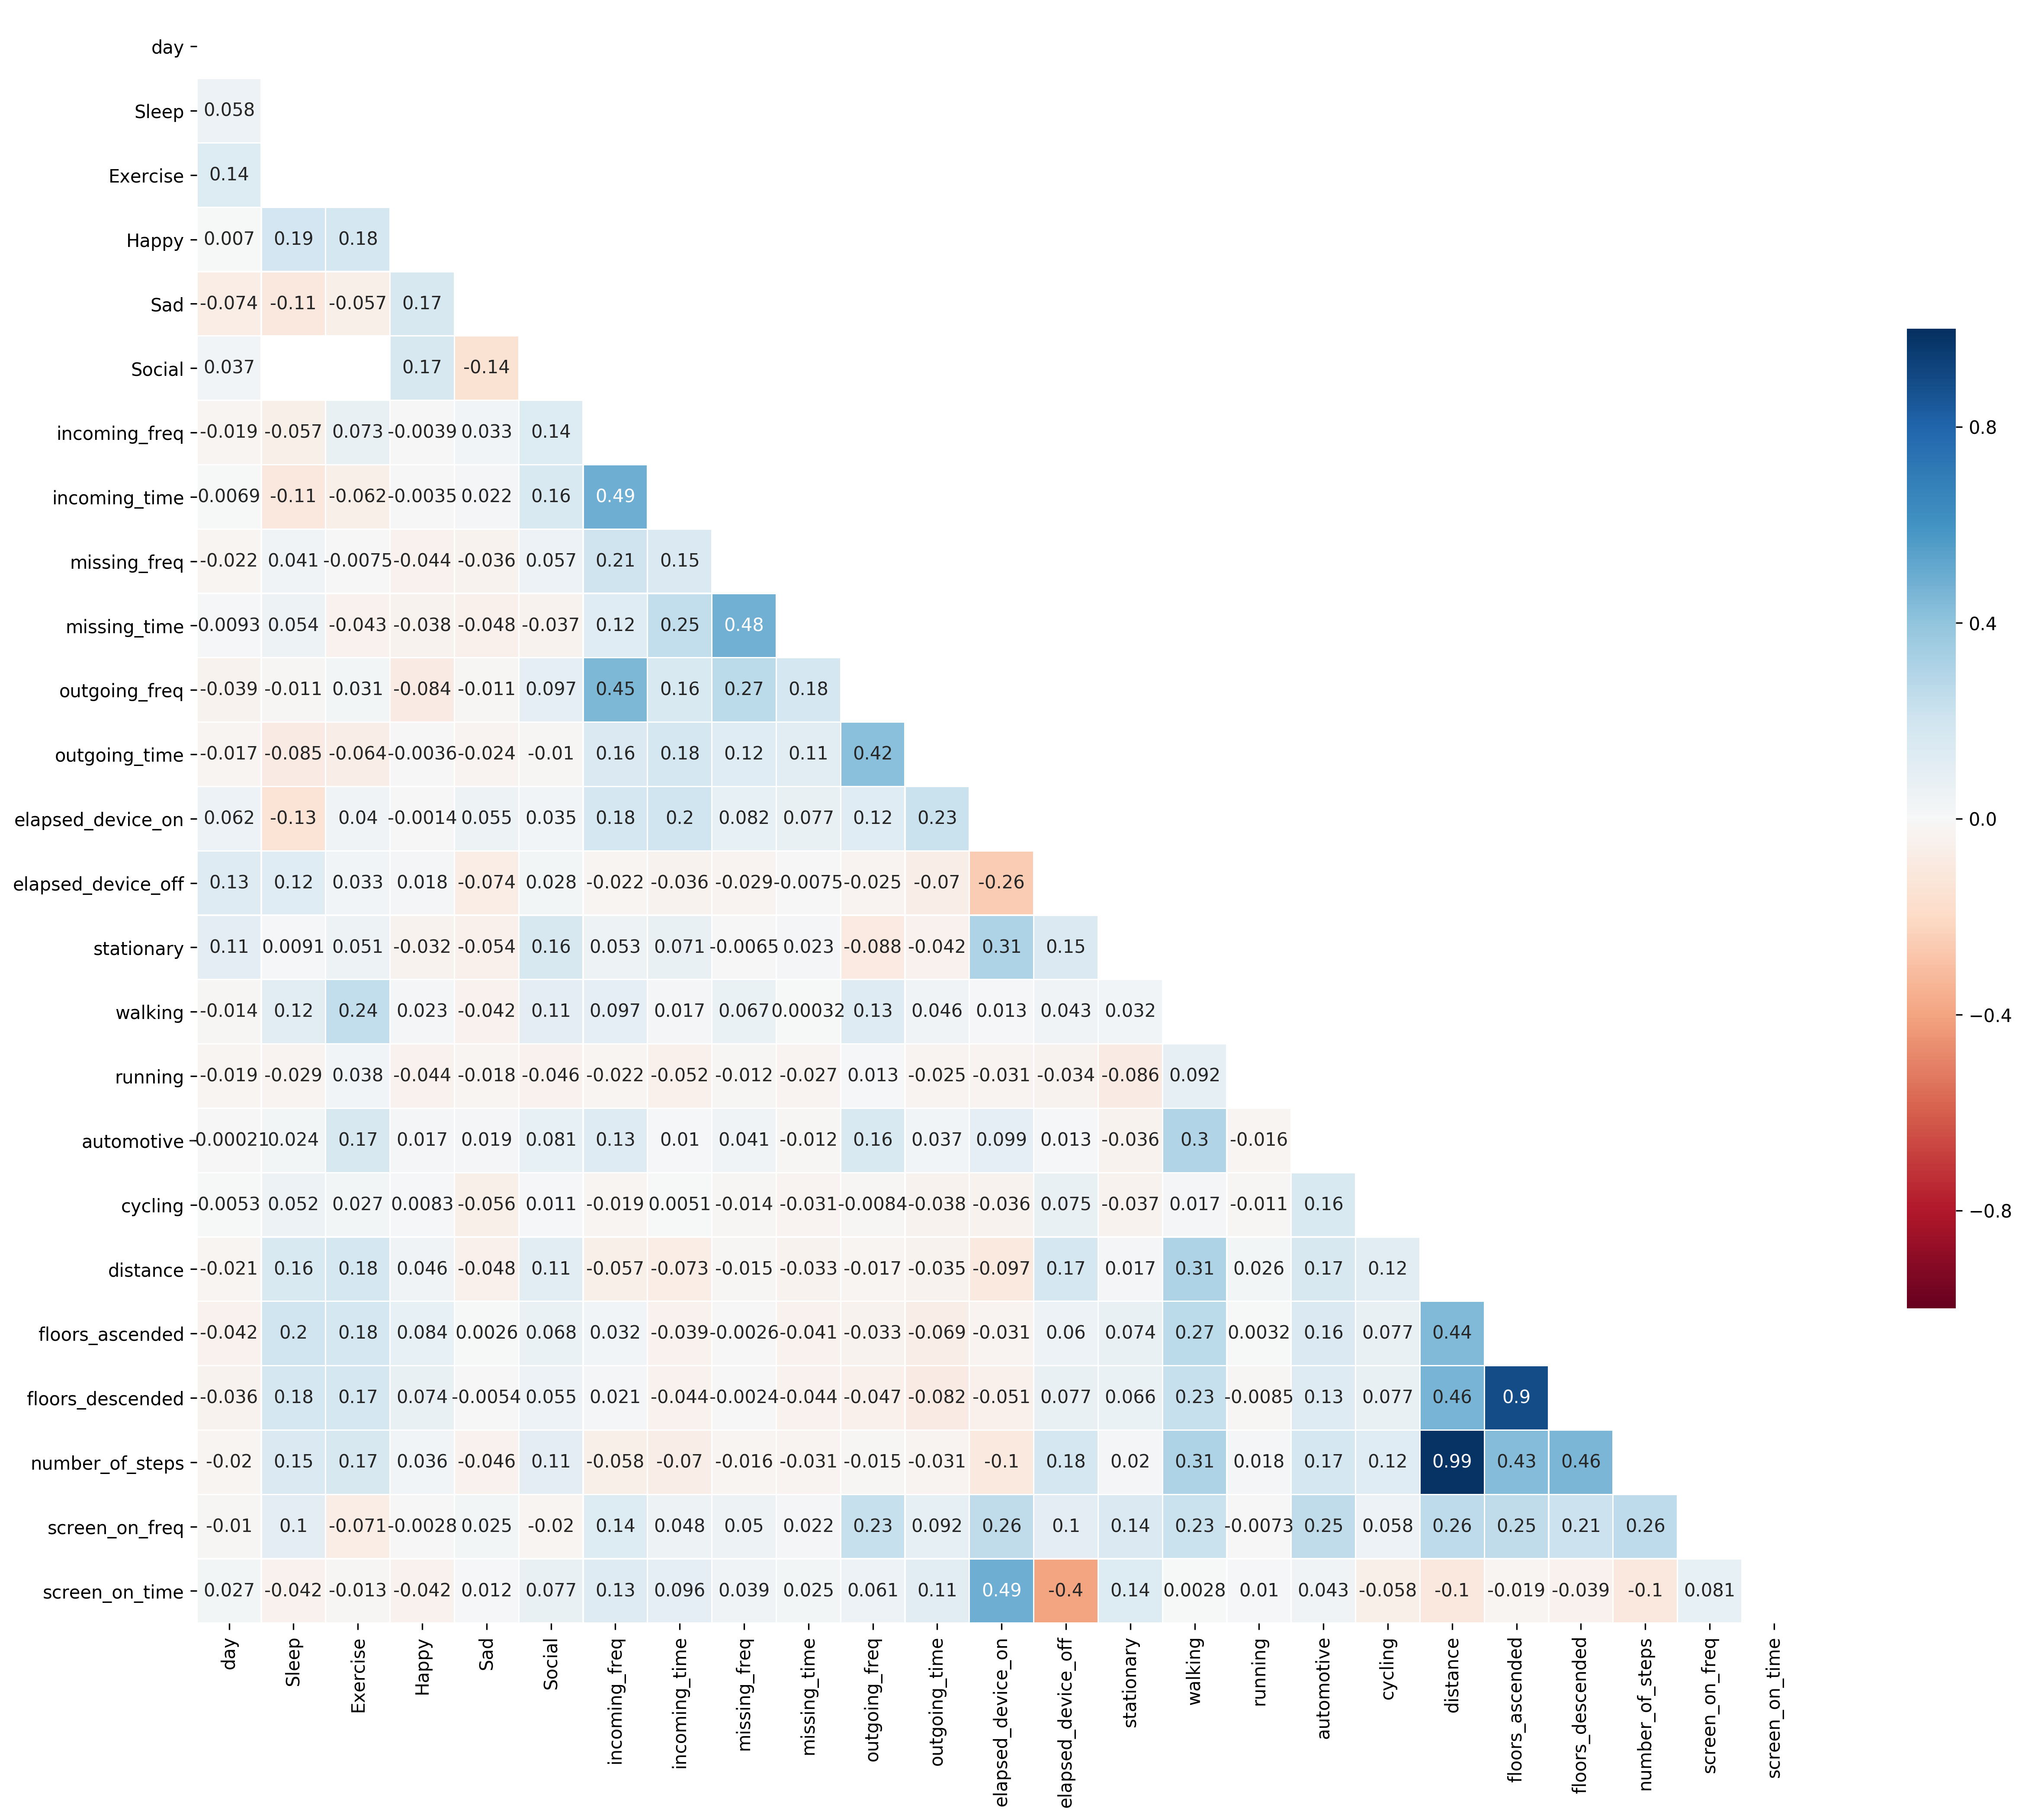

In [84]:
X = X[X.columns[~X.columns.str.contains('nan')]]
corr = X.corr(method='pearson')

# source: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20), dpi = 300)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='RdBu', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, annot=True,cbar_kws={"shrink": .5})
#sns.clustermap(X, z_score=1, metric='cosine')